# Save and load results as HDF5 files

In [2]:
# install if not done yet
# %pip install pypesto --quiet

In [4]:
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

import pypesto
import pypesto.optimize as optimize
import pypesto.profile as profile
import pypesto.sample as sample
import pypesto.store as store

%matplotlib inline

In this notebook, we will demonstrate how to save and (re-)load optimization results, profile results and sampling results to an `.hdf5` file. The use case of this notebook is to generate visualizations from reloaded result objects.

## Define the objective and problem

In [5]:
objective = pypesto.Objective(
    fun=sp.optimize.rosen,
    grad=sp.optimize.rosen_der,
    hess=sp.optimize.rosen_hess,
)

dim_full = 20
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Fill result object with profile, sample, optimization

In [6]:
# create optimizers
optimizer = optimize.ScipyOptimizer()

# set number of starts
n_starts = 10

# Optimization
result = pypesto.optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=n_starts, filename=None
)
# Profiling
result = profile.parameter_profile(
    problem=problem, result=result, optimizer=optimizer, filename=None
)
# Sampling
sampler = sample.AdaptiveMetropolisSampler()
result = sample.sample(
    problem=problem,
    sampler=sampler,
    n_samples=100000,
    result=result,
    filename=None,
)

  0%|          | 0/10 [00:00<?, ?it/s]Executing task 0.
Final fval=0.0000, time=0.0355s, n_fval=154.
Executing task 1.
Final fval=0.0000, time=0.0317s, n_fval=145.
Executing task 2.
Final fval=0.0000, time=0.0326s, n_fval=161.
 30%|███       | 3/10 [00:00<00:00, 28.87it/s]Executing task 3.
Final fval=0.0000, time=0.0275s, n_fval=144.
Executing task 4.
Final fval=0.0000, time=0.0295s, n_fval=154.
Executing task 5.
Final fval=0.0000, time=0.0258s, n_fval=133.
Executing task 6.
Final fval=0.0000, time=0.0281s, n_fval=140.
 70%|███████   | 7/10 [00:00<00:00, 32.19it/s]Executing task 7.
Final fval=3.9866, time=0.0256s, n_fval=118.
Executing task 8.
Final fval=3.9866, time=0.0297s, n_fval=150.
Executing task 9.
Final fval=3.9866, time=0.0281s, n_fval=114.
  0%|          | 0/20 [00:00<?, ?it/s]Executing task 0.
Final fval=0.0784, time=0.0043s, n_fval=19.
Final fval=0.2225, time=0.0019s, n_fval=7.
Final fval=0.4391, time=0.0017s, n_fval=7.
Final fval=0.7634, time=0.0014s, n_fval=3.
Final fval=

## Plot results

We now want to plot the results (before saving).

<AxesSubplot:title={'center':'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Offsetted function value (relative to best start)'>

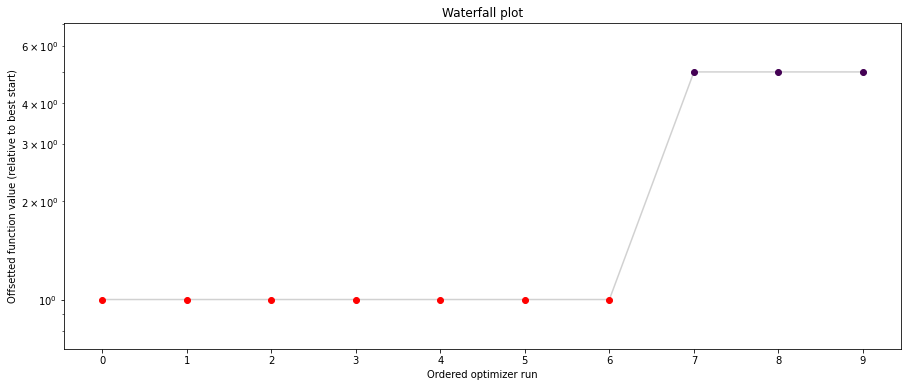

In [7]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15, 6))

[<AxesSubplot:xlabel='x0', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x1'>,
 <AxesSubplot:xlabel='x2'>,
 <AxesSubplot:xlabel='x3'>,
 <AxesSubplot:xlabel='x4'>,
 <AxesSubplot:xlabel='x5', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x6'>,
 <AxesSubplot:xlabel='x7'>,
 <AxesSubplot:xlabel='x8'>,
 <AxesSubplot:xlabel='x9'>,
 <AxesSubplot:xlabel='x10', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x11'>,
 <AxesSubplot:xlabel='x12'>,
 <AxesSubplot:xlabel='x13'>,
 <AxesSubplot:xlabel='x14'>,
 <AxesSubplot:xlabel='x15', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x16'>,
 <AxesSubplot:xlabel='x17'>,
 <AxesSubplot:xlabel='x18'>,
 <AxesSubplot:xlabel='x19'>]

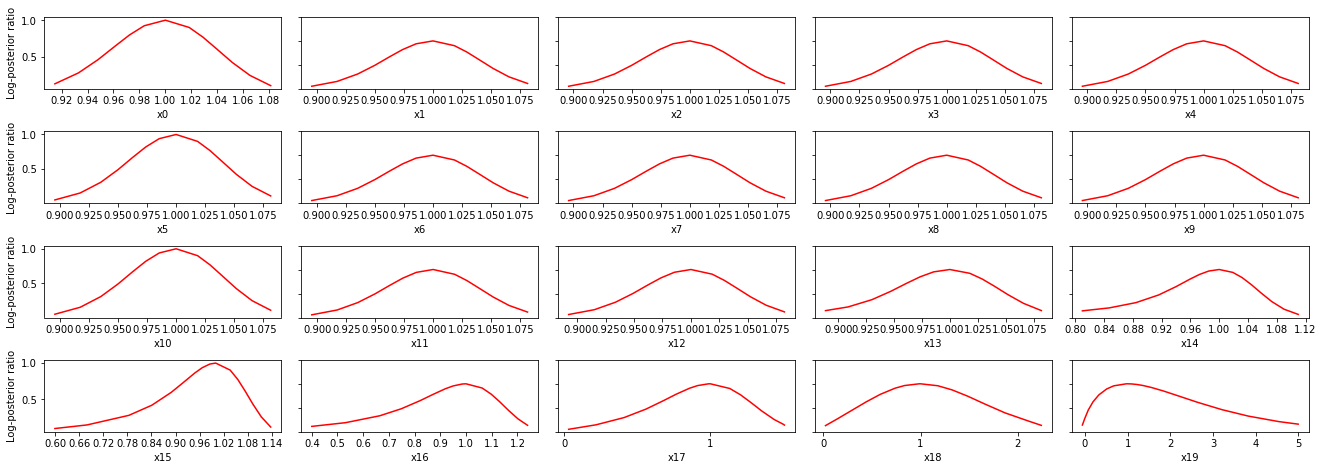

In [8]:
# plot profiles
pypesto.visualize.profiles(result)

<AxesSubplot:xlabel='iteration index', ylabel='log-posterior'>

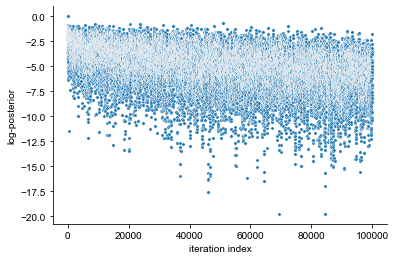

In [9]:
# plot samples
pypesto.visualize.sampling_fval_traces(result)

## Save result object in HDF5 File

In [10]:
# create temporary file
fn = tempfile.mktemp(".hdf5")

# write result with write_result function.
# Choose which parts of the result object to save with
# corresponding booleans.
store.write_result(
    result=result,
    filename=fn,
    problem=True,
    optimize=True,
    profile=True,
    sample=True,
)

## Reload results

In [14]:
# Read result
result2 = store.read_result(fn, problem=True)

This problem is not to be used without a separately created objective.


## Plot (reloaded) results

<AxesSubplot:title={'center':'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Offsetted function value (relative to best start)'>

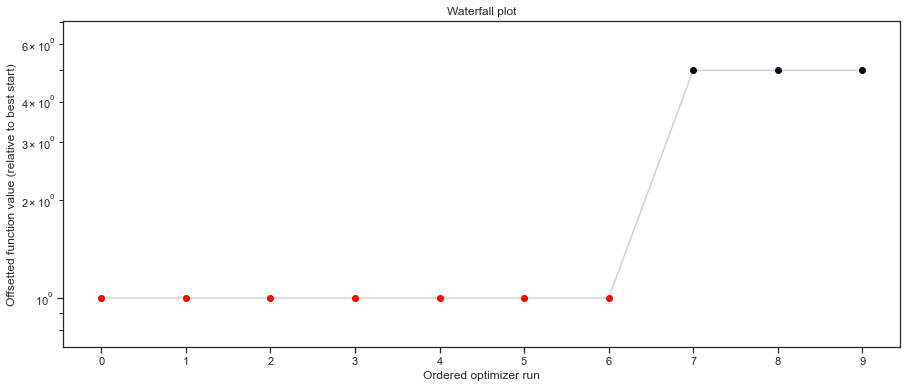

In [15]:
# plot waterfalls
pypesto.visualize.waterfall(result2, size=(15, 6))

[<AxesSubplot:xlabel='x0', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x1'>,
 <AxesSubplot:xlabel='x2'>,
 <AxesSubplot:xlabel='x3'>,
 <AxesSubplot:xlabel='x4'>,
 <AxesSubplot:xlabel='x5', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x6'>,
 <AxesSubplot:xlabel='x7'>,
 <AxesSubplot:xlabel='x8'>,
 <AxesSubplot:xlabel='x9'>,
 <AxesSubplot:xlabel='x10', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x11'>,
 <AxesSubplot:xlabel='x12'>,
 <AxesSubplot:xlabel='x13'>,
 <AxesSubplot:xlabel='x14'>,
 <AxesSubplot:xlabel='x15', ylabel='Log-posterior ratio'>,
 <AxesSubplot:xlabel='x16'>,
 <AxesSubplot:xlabel='x17'>,
 <AxesSubplot:xlabel='x18'>,
 <AxesSubplot:xlabel='x19'>]

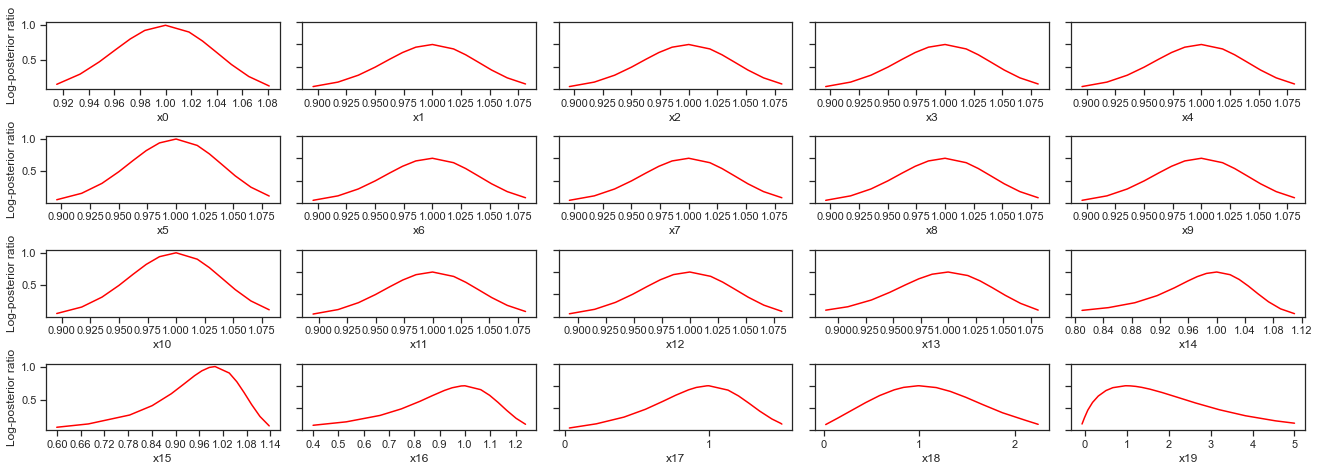

In [16]:
# plot profiles
pypesto.visualize.profiles(result2)

<AxesSubplot:xlabel='iteration index', ylabel='log-posterior'>

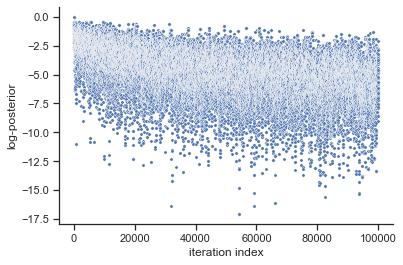

In [34]:
# plot samples
pypesto.visualize.sampling_fval_traces(result2)

For the saving of optimization history, we refer to
[store.ipynb](store.ipynb).
